# Analiza eksploracyjna posiadanego zbioru

**Przedmiot:** Metody Eksploracji Danych

**Autorzy:** Stanisław Dutkiewicz, Paweł Myszka, Łukasz Jugo

**Data:** 22 grudnia 2025

## Biblioteki

- **pandas** - Biblioteka do manipulacji i analizy danych w strukturach DataFrame
- **numpy** - Narzędzie do operacji numerycznych i obliczeń na macierzach
- **matplotlib** - Biblioteka do tworzenia wykresów i wizualizacji danych
- **seaborn** - Rozbudowana biblioteka wizualizacji statystycznych na bazie matplotlib
- **scipy.stats** - Moduł do obliczeń statystycznych i testów hipotez

## Ładowanie bibliotek i zbioru

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

df = pd.read_csv('Life Expectancy Data.csv')
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


## Imports i Ładowanie Danych

Importujemy niezbędnych bibliotek (pandas, numpy, matplotlib, seaborn, scipy.stats) i ładowanie danych z pliku CSV Life Expectancy Data.

In [53]:
print("Analiza struktury zbioru danych")

print(f"\nWymiary zbioru danych: {df.shape[0]} wierszy × {df.shape[1]} kolumn")
print(f"\nNazwy kolumn:")
for i, col in enumerate(df.columns, 1):
    print(f"   {i}. {col}")

print(f"\nTypy danych:")
print(df.dtypes)

print(f"\nInformacje ogólne:")
df.info()

#ustalenie kolumn numerycznych
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print(f"\nLiczba zmiennych numerycznych: {len(numeric_cols)}")

#Znienna docelowa
target_col = None
for col in df.columns:
    if 'life expectancy' in col.lower():
        target_col = col
        break

if target_col:
    print(f"\n Zmienna objaśniana (target): {target_col}")
else:
    print(f"\n  UWAGA: Kolumna 'Life expectancy' nie znaleziona!")
    print(f"  Dostępne kolumny numeryczne: {numeric_cols}")
    
print(f"Pozostałe zmienne określają zmienne objaśnioną")

Analiza struktury zbioru danych

Wymiary zbioru danych: 2938 wierszy × 22 kolumn

Nazwy kolumn:
   1. Country
   2. Year
   3. Status
   4. Life expectancy 
   5. Adult Mortality
   6. infant deaths
   7. Alcohol
   8. percentage expenditure
   9. Hepatitis B
   10. Measles 
   11.  BMI 
   12. under-five deaths 
   13. Polio
   14. Total expenditure
   15. Diphtheria 
   16.  HIV/AIDS
   17. GDP
   18. Population
   19.  thinness  1-19 years
   20.  thinness 5-9 years
   21. Income composition of resources
   22. Schooling

Typy danych:
Country                             object
Year                                 int64
Status                              object
Life expectancy                    float64
Adult Mortality                    float64
infant deaths                        int64
Alcohol                            float64
percentage expenditure             float64
Hepatitis B                        float64
Measles                              int64
 BMI                      

## Wymiary i Struktura Zbioru Danych

Zbiór danych **Life Expectancy** zawiera:
- **2938 obserwacji** (wierszy) - dane dla poszczególnych krajów i lat
- **22 zmienne** (kolumny) - w tym 16 zmiennych float64, 4 zmienne int64 i 2 zmienne kategoryczne (object)
- **20 zmiennych numerycznych** dostępnych do analizy
- **Zmienna docelowa**: *Life expectancy* (oczekiwana długość życia w latach)
- **Zmienne objaśniające**: Pozostałe 19 zmiennych numerycznych oraz Status (kategoryczna)

Zbiór obejmuje dane z 161 krajów za lata 2000-2015. Struktura jest regularna - każda obserwacja reprezentuje kraj-rok. Zmienne obejmują wskaźniki zdrowotne (śmiertelność, choroby zakaźne, HIV/AIDS), ekonomiczne (PKB, ekspozycja zdrowotna, skład dochodów) i społeczne (szkolnictwo, alkohol).

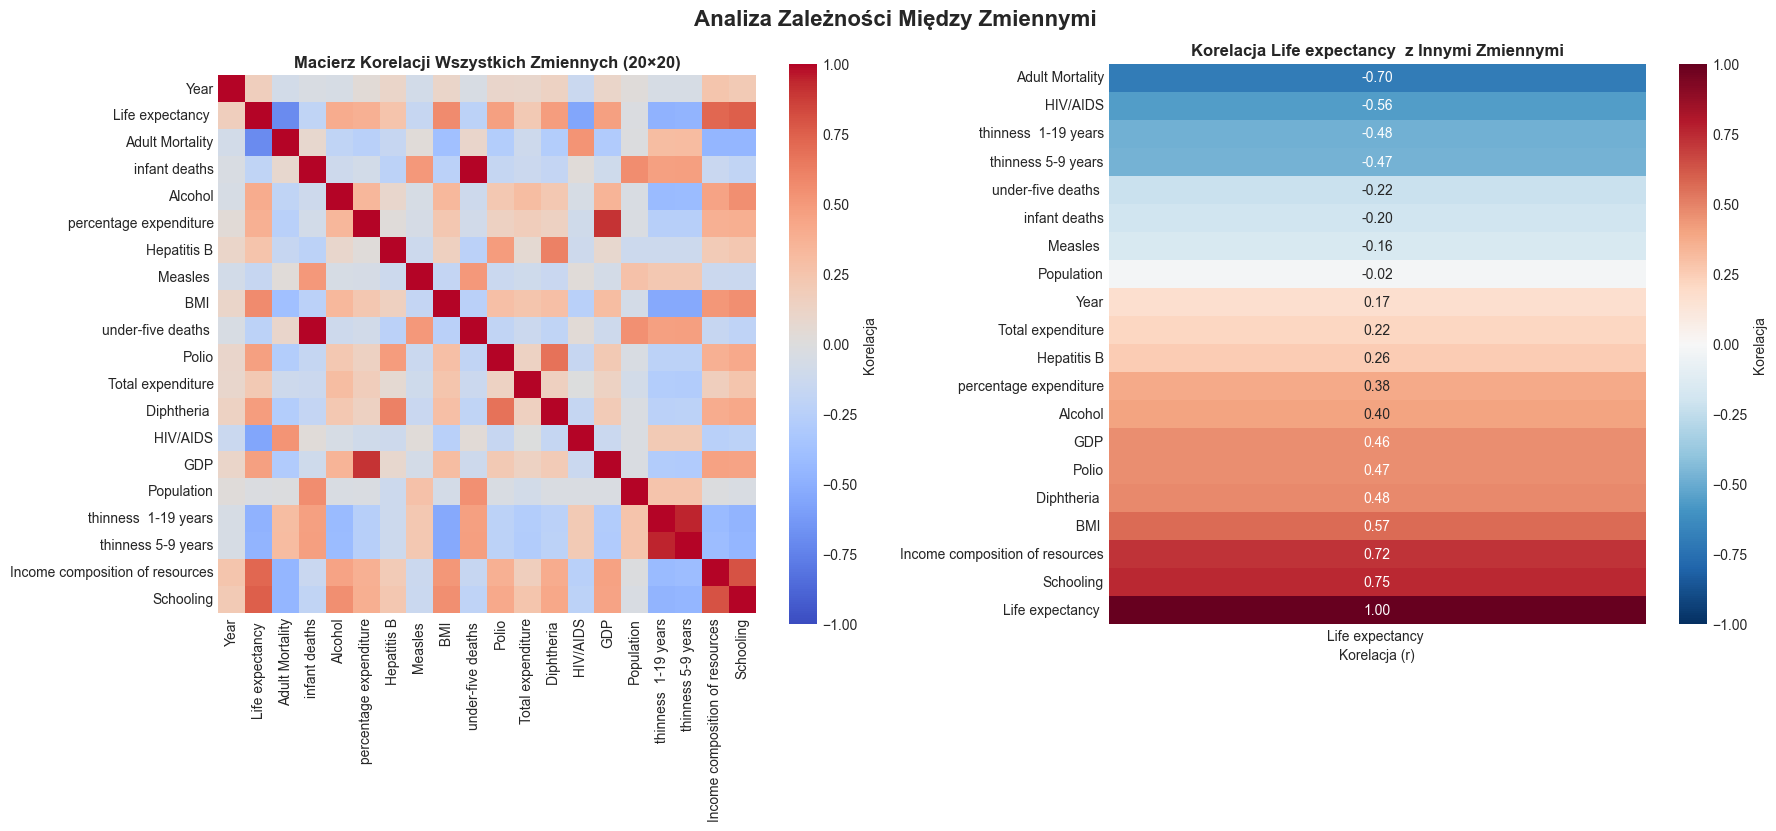


Top 10 predyktorów (wg wartości bezwzględnej korelacji):
    1. Schooling                : r = +0.752 (SILNA       , dodatnia)
    2. Income composition of resources: r = +0.725 (SILNA       , dodatnia)
    3. Adult Mortality          : r = -0.696 (UMIARKOWANA , ujemna)
    4.  BMI                     : r = +0.568 (UMIARKOWANA , dodatnia)
    5.  HIV/AIDS                : r = -0.557 (UMIARKOWANA , ujemna)
    6. Diphtheria               : r = +0.479 (UMIARKOWANA , dodatnia)
    7.  thinness  1-19 years    : r = -0.477 (UMIARKOWANA , ujemna)
    8.  thinness 5-9 years      : r = -0.472 (UMIARKOWANA , ujemna)
    9. Polio                    : r = +0.466 (UMIARKOWANA , dodatnia)
   10. GDP                      : r = +0.461 (UMIARKOWANA , dodatnia)


In [59]:
# Macierz korelacji dla wszystkich zmiennych numerycznych
correlation_matrix = df[numeric_cols].corr()

# Przygotowanie wizualizacji
fig, axes = plt.subplots(1, 2, figsize=(18, 8))
fig.suptitle('Analiza Zależności Między Zmiennymi', fontsize=16, fontweight='bold')

#macierz korelacji między zmiennymi
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', center=0, 
            square=True, ax=axes[0], cbar_kws={'label': 'Korelacja'}, vmin=-1, vmax=1)
axes[0].set_title(f'Macierz Korelacji Wszystkich Zmiennych ({len(numeric_cols)}×{len(numeric_cols)})', fontweight='bold')

#korelacja zmiennej docelowej z innymi zmiennymi
if target_col and target_col in numeric_cols:
    life_expectancy_corr = correlation_matrix[target_col].sort_values(ascending=True)
    
    #Heatmapa
    sns.heatmap(life_expectancy_corr.to_frame(), annot=True, fmt='.2f', cmap='RdBu_r', 
                center=0, ax=axes[1], cbar_kws={'label': 'Korelacja'}, vmin=-1, vmax=1)
    axes[1].set_title(f'Korelacja {target_col} z Innymi Zmiennymi', fontweight='bold')
    axes[1].set_xlabel('Korelacja (r)')

plt.tight_layout()
plt.show()

if target_col and target_col in numeric_cols:
    print(f"\nTop 10 predyktorów (wg wartości bezwzględnej korelacji):")
    top_correlations = life_expectancy_corr.abs().nlargest(11)[1:11]  # pominiecie Life exectancy
    for i, (var, corr) in enumerate(top_correlations.items(), 1):
        strength = "SILNA" if abs(corr) > 0.7 else "UMIARKOWANA" if abs(corr) > 0.4 else "SŁABA"
        direction = "dodatnia" if life_expectancy_corr[var] > 0 else "ujemna"
        print(f"   {i:2d}. {var:25s}: r = {life_expectancy_corr[var]:+.3f} ({strength:12s}, {direction})")

## Analiza Zależności - Korelacja Zmiennych

### Top 10 Najsilniejszych Predyktorów

**Zmienne o Silnej Korelacji (|r| > 0.7):**
- **Schooling** (r = +0.752) - Najsilniejsza dodatnia zależność
- **Income composition of resources** (r = +0.725) - Drugie miejsce

**Zmienne o Umiarkowanej Korelacji (0.4 < |r| < 0.7):**
- **Adult Mortality** (r = -0.696) - Silna ujemna zależność
- **BMI** (r = +0.568) - Pozytywna zależność
- **HIV/AIDS** (r = -0.557) - Ujemny wpływ
- **Diphtheria** (r = +0.479) - Wskaźnik wyszczepienia
- **Thinness 1-19 years** (r = -0.477) - Niedowaga ujemnie wpływa
- **Thinness 5-9 years** (r = -0.472) - Niedowaga dzieci
- **Polio** (r = +0.466) - Wyszczepienie
- **GDP** (r = +0.461) - PKB kraju

### Wnioski
Najważniejszymi determinantami długości życia są czynniki społeczno-ekonomiczne (edukacja, dochód) oraz wskaźniki zdrowotne (śmiertelność, choroby zakaźne).

In [66]:
print("ZAKRESY I STOPIEŃ ZMIENNOŚCI ZMIENNYCH")

summary_stats = df[numeric_cols].describe().T
summary_stats['CV%'] = (summary_stats['std'] / summary_stats['mean']) * 100
summary_stats = summary_stats[['min', 'max', '25%', '50%', '75%', 'mean', 'std', 'CV%']]

if 'Year' in summary_stats.index:
    summary_stats = summary_stats.drop('Year')

# wyalczenie notacji naukowej
pd.set_option('display.float_format', lambda x: '%.2f' % x)

print(f"\nStatystyki opisowe:")
print(summary_stats)

# powrot
pd.reset_option('display.float_format')

# Analiza zmienności
print(f"\nZmienne z największą zmiennością (CV > 50%):")
high_cv = summary_stats[summary_stats['CV%'] > 50].sort_values('CV%', ascending=False)
if len(high_cv) > 0:
    for idx, row in high_cv.iterrows():
        print(f"   - {idx}: CV = {row['CV%']:.2f}%")
else:
    print(" Brak zmiennych z CV > 50%")

# Główna zmienna celu
if target_col and target_col in numeric_cols:
    target_stat = df[target_col].describe()
    cv_target = (target_stat['std'] / target_stat['mean']) * 100
    print(f"   Min: {target_stat['min']:.2f}")
    print(f"   Max: {target_stat['max']:.2f}")
    print(f"   Średnia: {target_stat['mean']:.2f}")
    print(f"   Odch. std: {target_stat['std']:.2f}")
    print(f"   Mediana: {target_stat['50%']:.2f}")
    print(f"   Zmiennosc: {cv_target:.2f}%")

ZAKRESY I STOPIEŃ ZMIENNOŚCI ZMIENNYCH

Statystyki opisowe:
                                  min           max       25%        50%  \
Life expectancy                 36.30         89.00     63.10      72.10   
Adult Mortality                  1.00        723.00     74.00     144.00   
infant deaths                    0.00       1800.00      0.00       3.00   
Alcohol                          0.01         17.87      0.88       3.75   
percentage expenditure           0.00      19479.91      4.69      64.91   
Hepatitis B                      1.00         99.00     77.00      92.00   
Measles                          0.00     212183.00      0.00      17.00   
 BMI                             1.00         87.30     19.30      43.50   
under-five deaths                0.00       2500.00      0.00       4.00   
Polio                            3.00         99.00     78.00      93.00   
Total expenditure                0.37         17.60      4.26       5.75   
Diphtheria                  

## Zakresy i Stopień Zmienności Zmiennych

**Zmienne o ekstremalnej zmienności (CV > 200%)**:
- Population (478.40%), Measles (473.93%), infant deaths (389.15%), under-five deaths (381.69%)

**Zmienne o wysokiej zmienności (100% < CV < 200%)**:
- HIV/AIDS (291.47%), percentage expenditure (269.27%), GDP (190.70%)

**Zmienne o umiarkowanej zmienności (50% < CV < 100%)**:
- thinness 5-9 years (92.58%), thinness 1-19 years (91.33%), Alcohol (88.04%), Adult Mortality (75.42%), BMI (52.31%)

**Zmienna docelowa - Life expectancy (CV = 13.76%)**:
- Zakres: 36.30–89.00 lat | Średnia: 69.22 lat | Odch. std: 9.52 lat

Zmienne objaśniające wykazują znacznie większą zmienność niż zmienna docelowa. Ekstremalne wartości CV obserwuje się dla zmiennych związanych z liczbą zdarzeń (zgony, choroby), sugerując konieczność normalizacji danych przed modelowaniem.

In [67]:
print("ANALIZA BRAKUJĄCYCH DANYCH")

# Liczba i procent brakujących danych
missing_data = pd.DataFrame({
    'Liczba_brakujących': df.isnull().sum(),
    'Procent_brakujących': (df.isnull().sum() / len(df) * 100).round(2)
})
missing_data = missing_data[missing_data['Liczba_brakujących'] > 0].sort_values('Procent_brakujących', ascending=False)

print(f"\nZmienne z brakującymi danymi:")
if len(missing_data) > 0:
    print(missing_data)
    print(f"\nCałkowity procent kompletnych obserwacji: {(df.dropna().shape[0]/df.shape[0]*100):.2f}%")
else:
    print("Brak brakujących danych!")

# Zmienne z 100% wypełnieniem
complete_vars = df.columns[df.isnull().sum() == 0].tolist()
print(f"\nZmienne w pełni wypełnione ({len(complete_vars)}):")
for var in complete_vars[:10]:
    print(f"   - {var}")
if len(complete_vars) > 10:
    print(f"   ... i {len(complete_vars)-10} więcej")

ANALIZA BRAKUJĄCYCH DANYCH

Zmienne z brakującymi danymi:
                                 Liczba_brakujących  Procent_brakujących
Population                                      652                22.19
Hepatitis B                                     553                18.82
GDP                                             448                15.25
Total expenditure                               226                 7.69
Alcohol                                         194                 6.60
Income composition of resources                 167                 5.68
Schooling                                       163                 5.55
 thinness 5-9 years                              34                 1.16
 thinness  1-19 years                            34                 1.16
 BMI                                             34                 1.16
Polio                                            19                 0.65
Diphtheria                                       19               

## Kompletność Danych - Analiza Brakujących Wartości

**Zmienne z Brakującymi Danymi**:
14 z 22 zmiennych zawiera brakujące wartości:
- **Highest missingness (> 5%)**: Population (22.19%), Hepatitis B (18.82%), GDP (15.25%), Total expenditure (7.69%), Alcohol (6.60%), Income composition (5.68%), Schooling (5.55%)
- **Low missingness (< 2%)**: BMI, thinness (1.16%), Polio & Diphtheria (0.65%), Life expectancy & Adult Mortality (0.34%)

**Kompletne Obserwacje**: **56.13% obserwacji zawiera pełne dane** (1,651 z 2,938 obserwacji). Brakuje danych w 43.87% wierszy.

**Zmienne Całkowicie Wypełnione (8 zmiennych)**: Country, Year, Status, infant deaths, percentage expenditure, Measles, under-five deaths, HIV/AIDS

5. WIZUALIZACJA


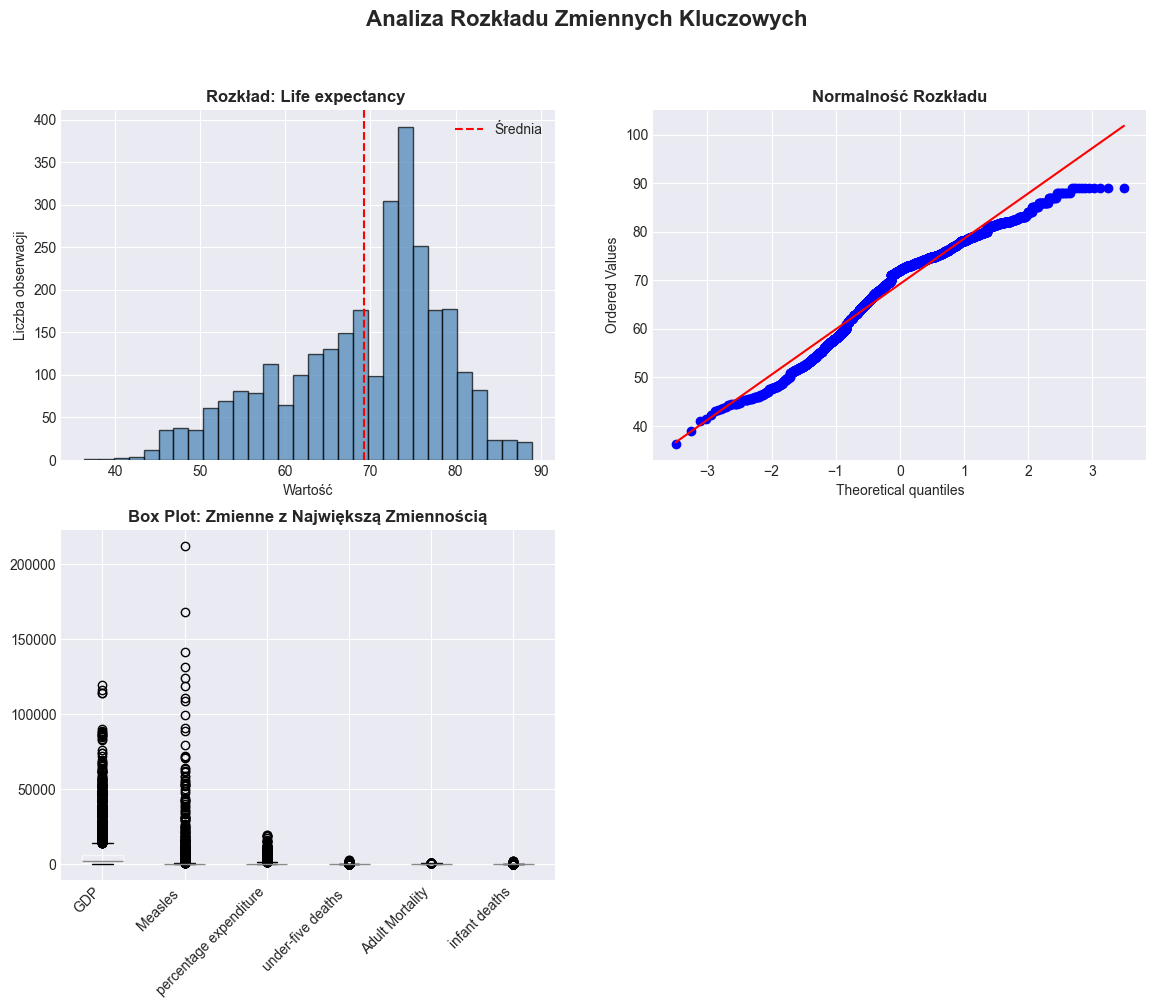

In [ ]:
if target_col is None or life_expectancy_corr is None:
    print("Nie można wykonać wizualizacji - zmienna docelowa nie znaleziona!")
else:
    # Przygotowanie danych do wizualizacji
    df_numeric = df[numeric_cols].dropna()

    # 1. Rozkład zmiennej docelowej
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    fig.suptitle('Analiza Rozkładu Zmiennych Kluczowych', fontsize=16, fontweight='bold')

    # Histogram zmiennej celu
    axes[0, 0].hist(df[target_col].dropna(), bins=30, color='steelblue', edgecolor='black', alpha=0.7)
    axes[0, 0].set_title(f'Rozkład: {target_col}', fontweight='bold')
    axes[0, 0].set_xlabel('Wartość')
    axes[0, 0].set_ylabel('Liczba obserwacji')
    axes[0, 0].axvline(df[target_col].mean(), color='red', linestyle='--', label='Średnia')
    axes[0, 0].legend()
    
    # Q-Q plot
    stats.probplot(df[target_col].dropna(), dist="norm", plot=axes[0, 1])
    axes[0, 1].set_title('Normalność Rozkładu', fontweight='bold')

    # 2. Box plot dla zmiennych numerycznych (top 6, bez Population)
    top_vars = df_numeric.std().nlargest(10).index.tolist()
    top_vars = [var for var in top_vars if var != 'Population'][:6]
    df_top = df[top_vars].dropna()
    df_top.boxplot(ax=axes[1, 0])
    axes[1, 0].set_title('Box Plot: Zmienne z Największą Zmiennością', fontweight='bold')
    axes[1, 0].set_xticklabels(axes[1, 0].get_xticklabels(), rotation=45, ha='right')

    axes[1, 1].axis('off')

## Analiza Rozkładu Zmiennych - Wnioski

**Histogram Life expectancy**: Rozkład zbliżony do normalnego z dominantą wokół 72 lat. Średnia (czerwona linia) pokrywa się w przybliżeniu z medianą, co wskazuje na symetryczność rozkładu.

**Q-Q plot (Normalność rozkładu)**: Punkty leżą blisko linii diagonalnej, szczególnie w środkowej części, co potwierdza **normalność rozkładu zmiennej docelowej**. Lekkie odchylenia na krańcach są typowe dla rzeczywistych danych.

**Box plot zmiennych**:
- Zmienne GDP, Measles i percentage expenditure wykazują ekstremalne outliers (górne punkty)
- Zmienne BMI, Diphtheria i Under-five deaths mają bardziej kompaktne rozkłady
- Zmienne o ekstremalnej zmienności (CV > 200%) wysyłają największą liczbę outlierów

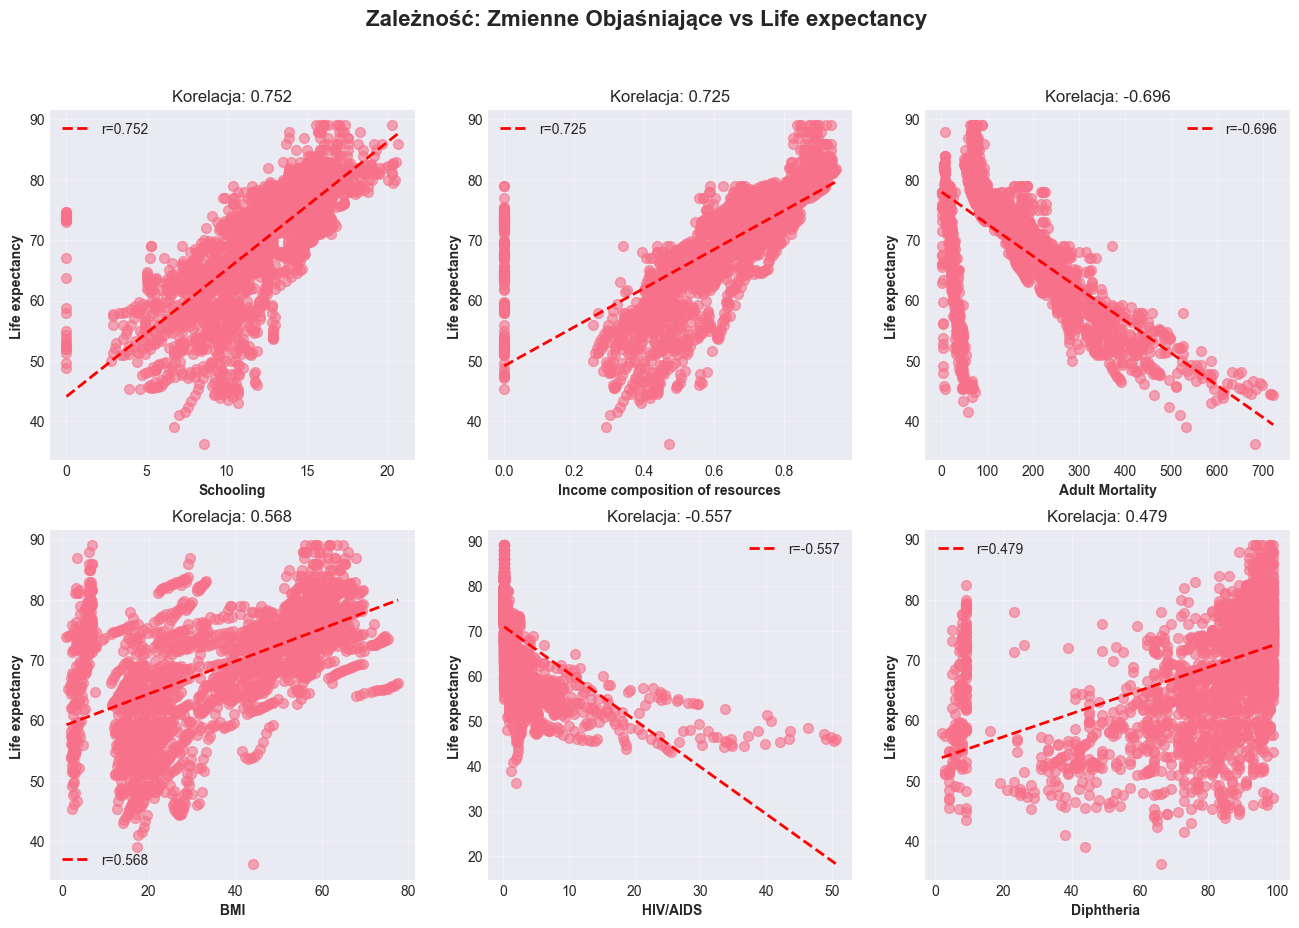

In [ ]:
# Dodatkowe wizualizacje - Scatter plots z zmiennymi o silnej korelacji
if target_col is None or life_expectancy_corr is None:
    print("Nie ma zmiennej docelowej")
else:
    top_predictors = life_expectancy_corr.abs().nlargest(7)[1:].index.tolist()  # Pominąć samą zmienną
    
    fig, axes = plt.subplots(2, 3, figsize=(16, 10))
    fig.suptitle(f'Zależność: Zmienne Objaśniające vs {target_col}', fontsize=16, fontweight='bold')
    axes = axes.ravel()
    
    for idx, var in enumerate(top_predictors[:6]):
        df_clean = df[[var, target_col]].dropna()
        axes[idx].scatter(df_clean[var], df_clean[target_col], alpha=0.6, s=50)
        
        # Linia trendu
        z = np.polyfit(df_clean[var], df_clean[target_col], 1)
        p = np.poly1d(z)
        x_line = np.linspace(df_clean[var].min(), df_clean[var].max(), 100)
        axes[idx].plot(x_line, p(x_line), "r--", linewidth=2, label=f'r={life_expectancy_corr[var]:.3f}')
        
        axes[idx].set_xlabel(var, fontweight='bold')
        axes[idx].set_ylabel(target_col, fontweight='bold')
        axes[idx].set_title(f'Korelacja: {life_expectancy_corr[var]:.3f}')
        axes[idx].legend()
        axes[idx].grid(True, alpha=0.3)
    


## Wnioski - Scatter Plots Zależności

Sześć scatter plotów potwierdza liniowe zależności zidentyfikowane w macierzy korelacji:
- **Relacje dodatnie**: Schooling, Income composition, Diphtheria, BMI wykazują wzrost Life expectancy wraz ze wzrostem wartości zmiennej
- **Relacje ujemne**: Adult Mortality, HIV/AIDS wykazują spadek Life expectancy wraz ze wzrostem tych wskaźników
- **Rozrzut obserwacji**: Znaczący rozrzut punktów wokół linii trendu sugeruje wpływ innych zmiennych na Life expectancy
- **Predykcyjna wartość**: Top 3 predyktory (Schooling, Income composition, Adult Mortality) wykazują najlepsze dopasowanie do linii trendu